In [1]:
%matplotlib inline
from matplotlib import pyplot
import geopandas

from weave_units import WeaveUnit
from tile_map import Tiling

In [14]:
us = geopandas.read_file("../data/states.gpkg").to_crs(4326)
us = us[us.state != "DC"]
us['d'] = us.dem / us.votes * 100
us['r'] = us.gop / us.votes * 100
us['g'] = us.grn / us.votes * 100
us['l'] = us.lib / us.votes * 100

In [25]:
w3 = WeaveUnit(spacing = 0.25, aspect = 1.,
                    margin = 0, strands = "ab|--", crs = us.crs)

tiling = Tiling(w3, us, id_var = "state")

/home/osullid3/Documents/code/weaving-space/weavingspace/tile_units.py:147: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  self.regularised_tile.geometry.buffer(self.fudge_factor)
/home/osullid3/Documents/code/weaving-space/weavingspace/tile_units.py:165: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  self.regularised_tile.geometry.buffer(-self.fudge_factor)


In [30]:
election_map = tiling.get_tiled_map(rotation = 30, prioritise_tiles = False)

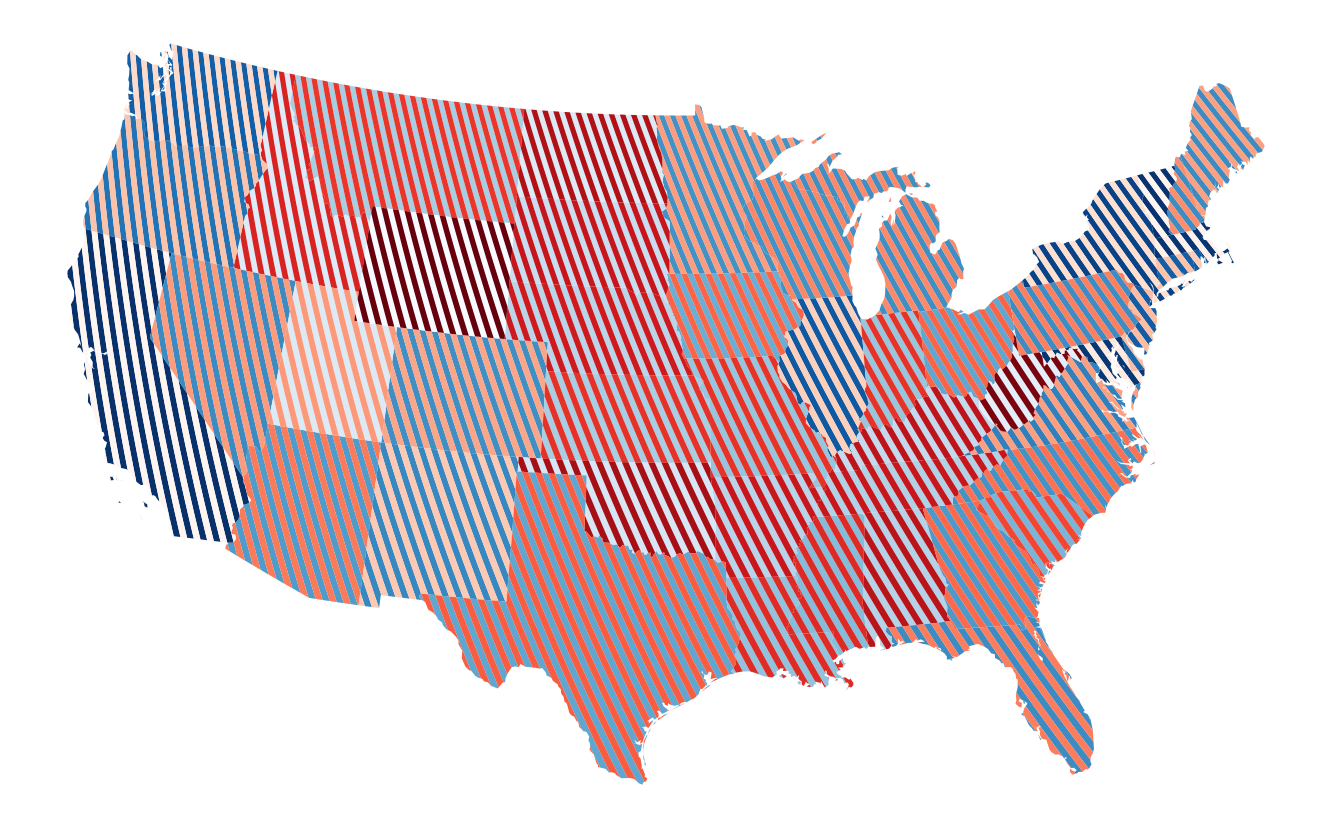

In [31]:
# election_map = election_map
fig = pyplot.figure(figsize = (24, 15))
# ax = fig.add_subplot(111)

strands = set(election_map.element_id)
cols = ["d", "r", "g", "l"]
cmaps = ("Blues", "Reds", "Greens", "Purples")

tiling.plot_map(fig, election_map.to_crs("epsg:5070"), cols, cmaps)
# for strand, col, cmap in zip(strands, cols, cmaps):
#     election_map[election_map.element_id == strand].plot(ax = ax, column = col, 
#                                                  cmap = cmap, k = 100,
#                                                  scheme = "equal_interval", 
#                                                  linewidth = 0)